## IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## DATA ANALYIZING

In [ ]:
df = pd.read_csv('Dataset/Austin_Waste.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


## DATA CLEANING

In [ ]:
df.isna().sum()

In [ ]:
weight_median = df['load_weight'].median()

df['load_weight'].fillna(weight_median, inplace=True)

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

## Data Exploration

In [ ]:
df['report_date']

In [ ]:
df['load_type'].unique()

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'BRUSH',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BULK', 'ORGANICS',
       'DEAD ANIMAL', 'MIXED LITTER', 'LITTER', 'RECYCLED METAL',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [ ]:
df['dropoff_site'].unique()

array(['MRF', 'TDS - MRF', 'ONION CREEK', 'PARK CENTER', 'HORNSBY BEND',
       'TDS LANDFILL', 'GREAT NORTHERN', 'ORGANICS BY GOSH',
       'BALCONES RECYCLING', 'ON ROUTE HIGH DUMP',
       'AUSTIN IRON AND METAL', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS',
       'AUSTIN WOOD RECYCLING', 'WILCAB'], dtype=object)

**Central Tendency Dropoff Site**

In [ ]:
site_mean = df.groupby('dropoff_site').mean()
site_mean

In [ ]:
top_mean = site_mean.sort_values(by='load_weight', ascending=False)
top_mean

In [ ]:
site_mode = df['dropoff_site'].mode()
site_mode

In [ ]:
site_median = df.groupby('dropoff_site').median()
site_median

**KESIMPULAN**

Data bla bla

**KOLOM AUSTIN IRON AND METAL**

Alasan bla bla

## DATA OUTLIER

In [ ]:
data_austin = df.loc[df['dropoff_site'] == 'AUSTIN IRON AND METAL']
data_austin

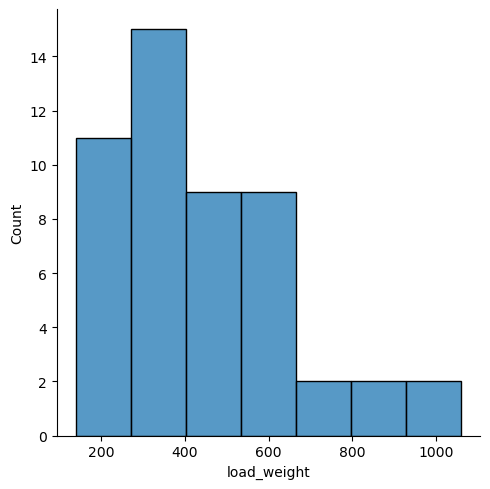

In [ ]:
sns.displot(data_austin['load_weight'])

In [ ]:
print("Data Austin Skewness {} and Kurtosis {}".format(data_austin['load_weight'].skew(), data_austin['load_weight'].kurt()))

Data Austin Skewness 0.8969633828989727 and Kurtosis 0.6977683675454167


**IQR**

In [ ]:
Q1 = data_austin['load_weight'].quantile(.25)
Q1

290.0

In [ ]:
Q3 = data_austin['load_weight'].quantile(.75)
Q3

557.5

In [ ]:
IQR = Q3 - Q1
IQR

267.5

In [ ]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

print("Lower {} and Upper {}".format(lower_lim, upper_lim))

Lower -111.25 and Upper 958.75


In [ ]:
outliers_upper = (data_austin['load_weight'] > upper_lim)
outliers_upper

In [ ]:
outliers_upper.value_counts()

** Kesimpulan

data bla

In [ ]:
mean_austin_iron = data_austin['load_weight'].mean()
median_austin_iron = data_austin['load_weight'].median()

In [ ]:
after_data_austin = data_austin[~outliers_upper]
after_data_austin

In [ ]:
after_mean_austin_iron = after_data_austin['load_weight'].mean()
after_median_austin_iron = after_data_austin['load_weight'].median()

In [ ]:
print("Before : Mean {} and Median {}".format(mean_austin_iron, median_austin_iron))
print("After : Mean {} and Median {}".format(after_mean_austin_iron, after_median_austin_iron))

Before : Mean 451.2 and Median 400.0
After : Mean 426.25 and Median 395.0


**Kesimpulan**

Bla bla

In [ ]:
after_data_austin.var()

In [ ]:
after_data_austin.max() 

In [ ]:
after_data_austin.min()

In [ ]:
after_data_austin.std()

In [ ]:
df['load_weight'].skew()

3.417227655659331

In [ ]:
ci = stats.norm.interval(0.95, df["load_weight"].mean(), df['load_weight'].std())
ci

(-1516.0800983840945, 25896.05987736486)

In [ ]:
t_stat,p_val = stats.ttest_1samp(df['load_weight'], 400)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: 272.6732563997973


In [ ]:
df[
    (df["load_type"] == "RECYCLED METAL")
].groupby("dropoff_site")[["load_weight"]].sum()

In [ ]:
AIM = df[
    (df["load_type"] == "RECYCLED METAL") &
    (df["dropoff_site"] == "AIM")
]

In [ ]:
AIM.groupby(["dropoff_site","load_type"])[["load_weight"]].mean()

## 1 Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
## Teknik yang digunakan berupa IQR, karena sebaran tidak normal
## 2 Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk   menyelesaikan langkah pada nomor 7
## konsep no 2 unutuk menetukan batas atas batas bawah sebuah penyebaran menentukan batas atas dan batas bawah penyebaran dimana jika data melewati batas tersebut maka data tersebut termasuk outliers


## PROBLEM 2 MATH

In [ ]:
a = df.groupby("report_date")["load_weight"].sum()
a

In [ ]:
a
b = range(len(a))
b

range(0, 166)

In [ ]:
v = np.gradient(a,b)

In [ ]:
z_besok = a[-1] + v[-1] * 1
abs(z_besok)

1188270.0

Pemahaman Konsep
1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
menggunakan numerik
2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
Ya, karena yang ditanyakan menghitung forecast pada hari esok 10 Juli 2021
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?
Forecast untuk load_weight yang diperkirakan di 10 Juli 2021  adalah 1.188.270 ton